# Linear Regression in Practice

In this lab we will work through an extended example of exploratory data analysis and supervised machine learning using the California Housing Price Dataset. This dataset consists of data about housing characteristics and prices in many districts of the state of California. The **task** this dataset asks us to solve is estimating the median house value in a district from a set of independent housing characteristics.

**Note**: the exercises are inline in this notebook and _not_ at the end. The exercises will ask you to write some code and sometimes to provide some analysis of your findings in Markdown cells at the end of the exercise.

## Part 1: Warming Up

In this first set of exercises we will analyze our dataset and build a simple linear regression pipeline. This is a fairly typical task that is asked of anyone working with Data Science: Here is some data, do something useful with it!


### Step 1: Data Modeling

OK, let's get started. The first thing we want to do is get our dataset loaded and start to get a feel for it. This is always a good idea -- we _play_ with the data first in order to get a better understanding of it.


In [1]:
# Initial imports -- these are fairly standard.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Import the function that will download the dataset.
from sklearn.datasets import fetch_california_housing

# Load the sklearn version of the California Housing dataset.
ds = fetch_california_housing(as_frame=True)

### Exercise 1a: Poking Around

Spend some time looking at the elements of the `ds` we just loaded (it's a python `dict`). Find the description of the dataset and make sure you understand what the features are and what the targets variable is. **Hints**: to get the keys of the dictionary, use: `ds.keys()`.

We are going to construct a Pandas `DataFrame` in the next exercise. Where can you get reasonable column names from the sklearn dataset object?


In [2]:

# Get the keys of the dictionary
keys = ds.keys()
print(keys)

# We accessed the dataset description using ds['DESCR'] to understand the dataset's features and target variable.
# The description provides detailed information about each feature and the target variable.
print(ds['DESCR'])


# Get reasonable column names
column_names = ds['feature_names']
print(column_names)
# The California Housing dataset provides a valuable opportunity to work on regression tasks and gain insights into housing prices in California districts.
# Proper data exploration, preprocessing,and modeling techniques can help in building predictive models
# and understanding the factors influencing house prices in different areas.

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
ex

In this analysis, we explored the California Housing dataset using scikit-learn.
This dataset is commonly used for regression tasks, where the goal is to predict
the median house value for California districts based on various features:

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

Our data matrix $\mathbf{X}$ is in 'ds.data' and has size _(20640, 8)_ and our targets y are in _ds.target_ and have size _(20640)_


### Exercise 1b: Creating a Pandas DataFrame

OK, now we can create the `DataFrame` to hold our independent variables and a `Series` to hold the target values. Make sure you use good column names when constructing the `DataFrame`. Some relevant documentation: [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) and [pandas.Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html).


In [3]:
# Create a Pandas DataFrame for our dataset and a Pandas Series for the targets.

# Create a Pandas DataFrame for the independent variables (features)
df = pd.DataFrame(data=ds['data'], columns=column_names)

# Create a Pandas Series for the target values
targets = pd.Series(data=ds.target, name='MedHouseValue')

# Display the first few rows of the DataFrame and the Series
print(df.head())
print('--------')
print(targets)  # la variabile che desideri prevedere o predire.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
--------
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseValue, Length: 20640, dtype: float64


### Exercise 1c: Examining the Data

Study the _descriptive statistics_ of the data. Do you notice anything "strange" about any of the features? Are the features scaled similarly? **Hint**: Use the `.describe()` method on the DataFrame you created.


In [4]:
# Your code here.
summary = df.describe()
print(summary)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

The "count" row in the summary statistics is the same for all columns,
indicating that there are no missing values in the dataset. This is a positive aspect as missing data can often complicate analysis.

Observations: The "AveRooms" feature has a maximum value that appears significantly higher than the 75th percentile.
This suggests the presence of outliers or extreme values in the dataset.
Similarly, the "AveBedrms" feature also has a maximum value much higher than the 75th percentile, indicating potential outliers.

We can also see al lot of variance in the inputs.


---

### Step 2: Visualization

OK, now that we have a bit of a _feel_ for our data, let's get a better idea about it through visualization.


### Exercise 2a: Visualizing the Target

Create a plot to study the **distribution** of our target values. The best tool for that is a **histogram**. Search for this functionality in the Matplotlib documentation.

**Note**: In addition to _histograms_, try out the Seaborn function `distplot`.


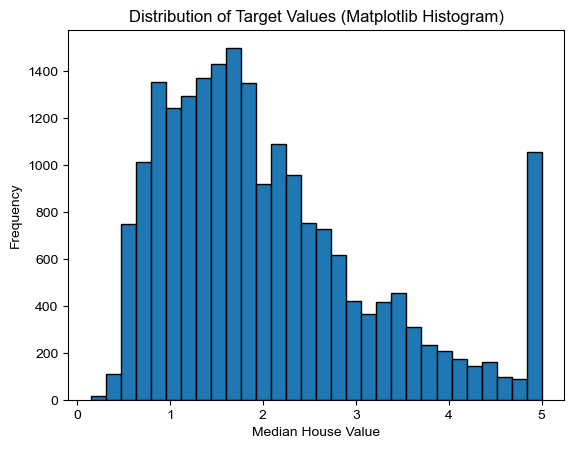

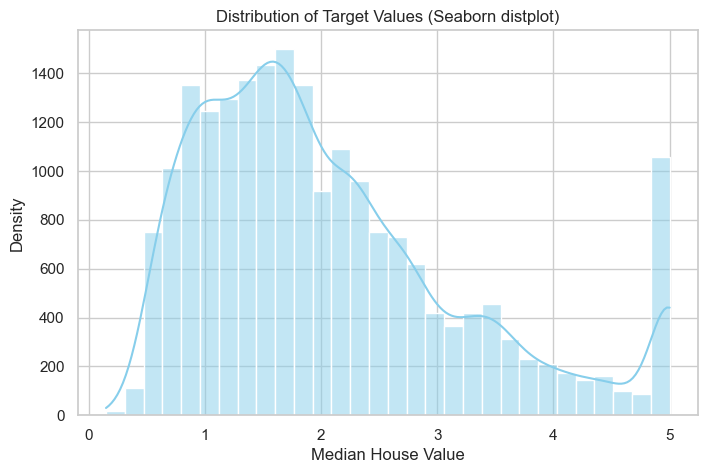

In [5]:

newTarget = ((df-df.mean()) / df.std())

plt.hist(targets, bins=30, edgecolor='black')

plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values (Matplotlib Histogram)')

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))  # Adjust the figure size if needed
sns.histplot(targets, bins=30, color='skyblue',
             kde=True)  # bigger than 5 is cap

# Add labels and a title
plt.xlabel('Median House Value')
plt.ylabel('Density')
plt.title('Distribution of Target Values (Seaborn distplot)')

# Show the plot
plt.show()

**Your Analysis Here**.


### Exercise 2b: Subplots

Now create a multi-plot figure to visualize the distributions of **all** of the independent features in the dataset. Make sure you use `figsize=` to resize the figure appropriately.

A few things that will help with this:

- If you want to index columns by **integer** indices, use the `.iloc()` method (e.g. `df.iloc[:,1]`).
- If you extract a column as a `Series` from a `DataFrame`, you can recover its name with the `name` attribute.
- Encapsulate you plotting code in a **function** you can call later.

**Super Hint**: Pandas already has this functionality **built-in**. If you can find it, use it!


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

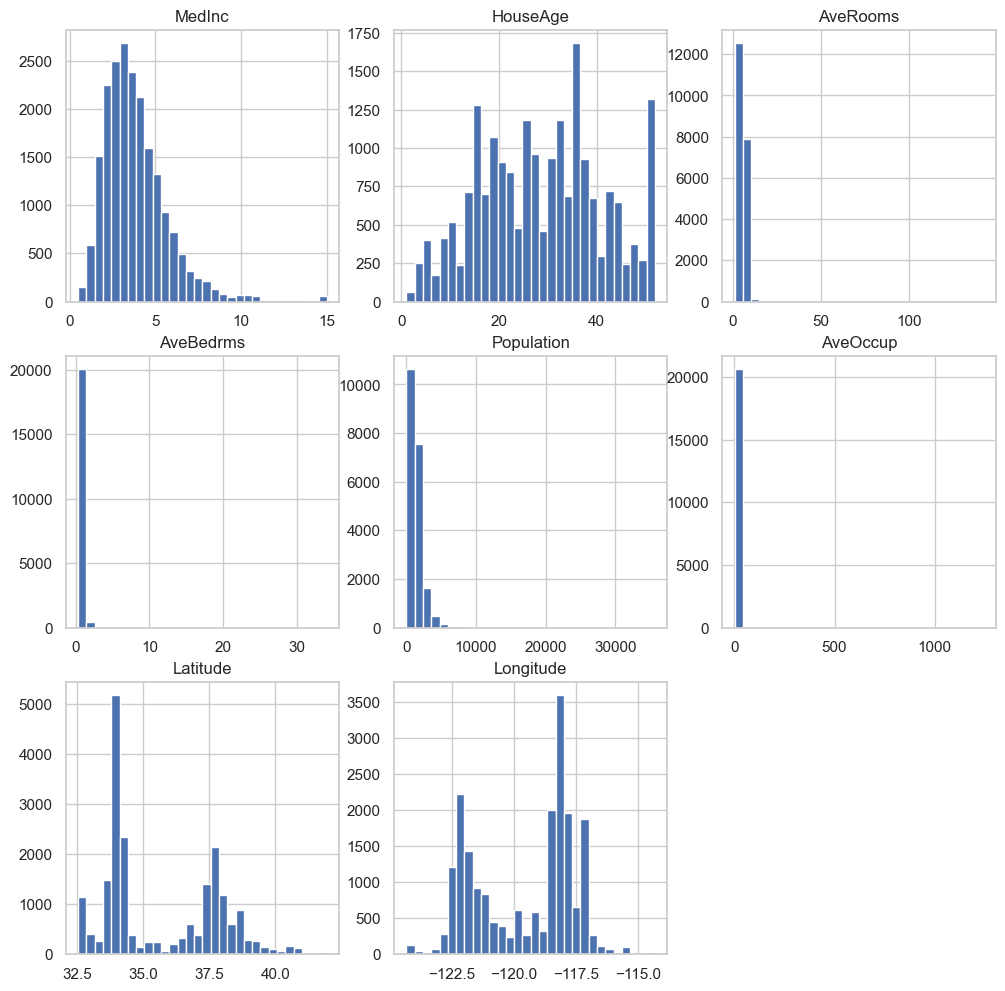

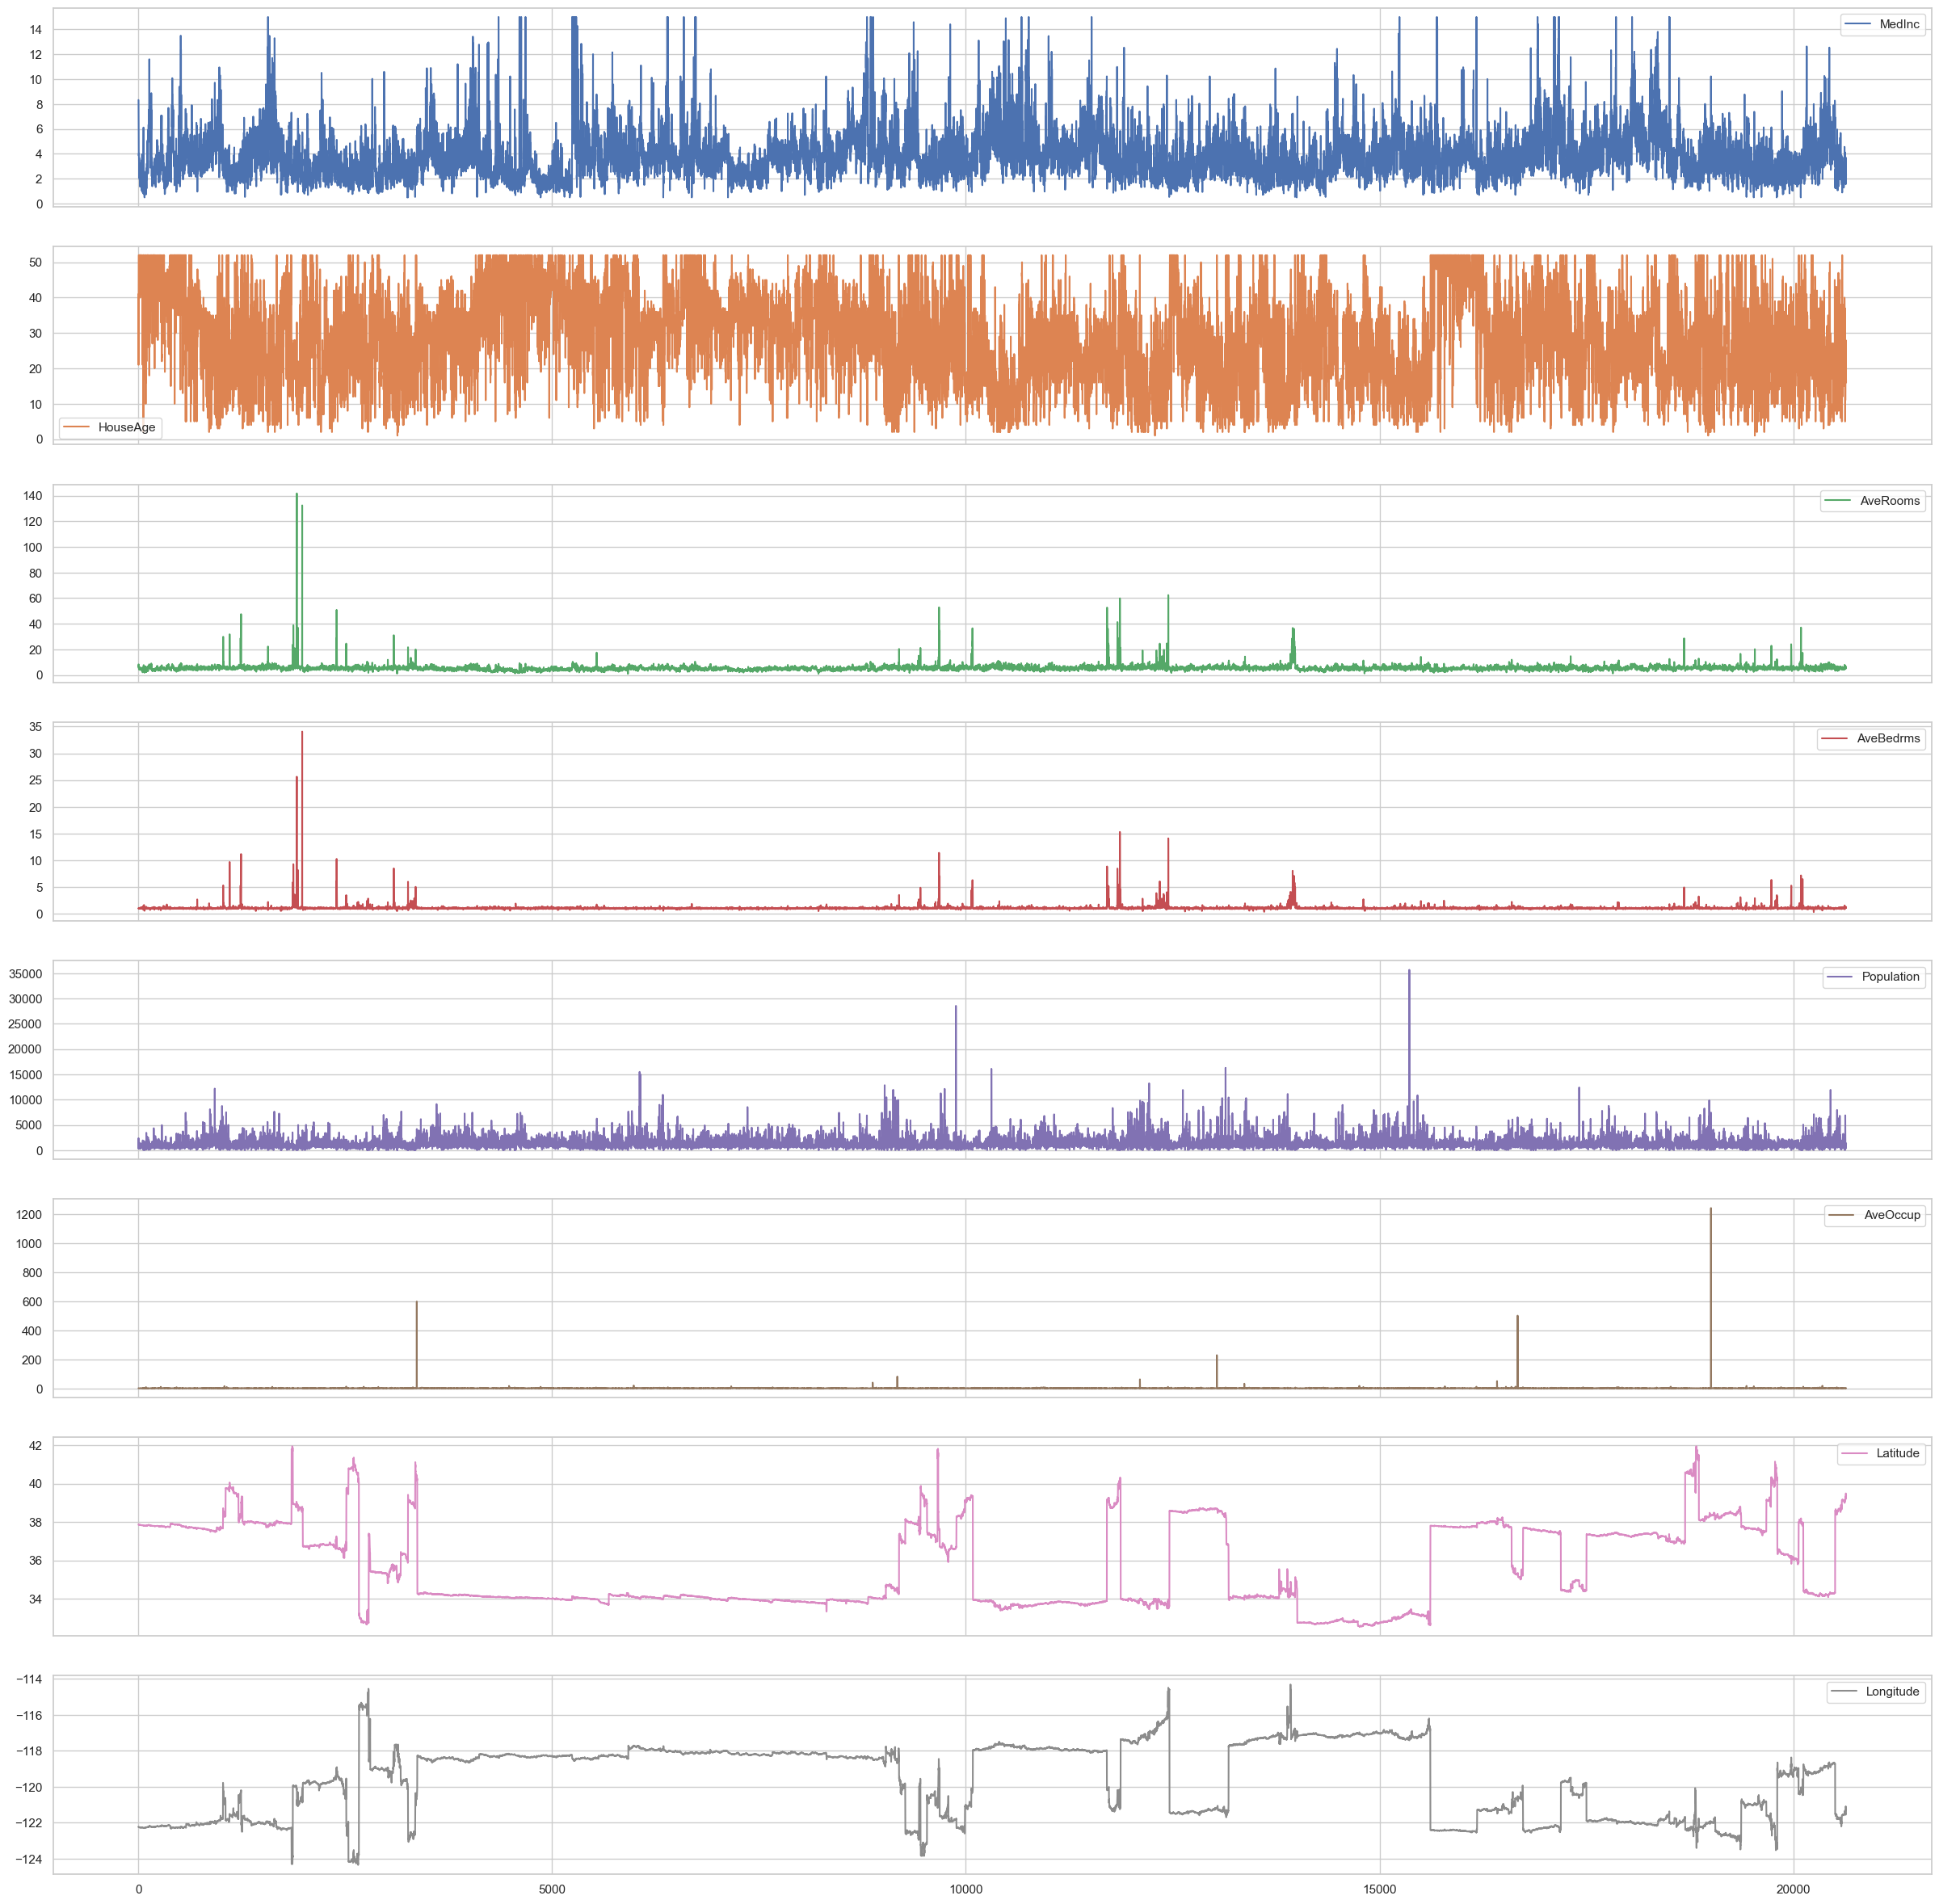

In [6]:
plt.figure(figsize=(12, 12))
for (i, col) in enumerate(df.columns):
    plt.subplot(3, 3, i+1)  # plot on grid 3x3
    plt.hist(df[col], 30)
    plt.title(df[col].name)

df.plot(subplots=True, figsize=(30, 30))

---

## Step 3: Split you Data

A very important step. Now we will split our `DataFrame` into training and testing splits.

### Exercise 3.1: Create a Split

Now we need to create our training and testing splits. Read the documentation for `sklearn.model_selection.train_test_split()`. Use this function to create a **training** split with 75% of the data, and a **test** split with 25% of the data.


In [7]:
from sklearn.model_selection import train_test_split

# random choice of elements of df. This allow us to create a prediction model with the 75% of data and see how well it fits with the 25% left.
(Xtr, Xte, ytr, yte) = train_test_split(df, targets, train_size=0.75)

(Xtr.shape, Xte.shape)

((15480, 8), (5160, 8))

_train_size_ : This parameter specifies the proportion of the dataset to include in the training split. train_size=0.75 means that 75% of the data will be used for training, and the remaining 25% will be used for testing/validation.
The purpose of splitting the data into training and testing sets is to evaluate how well your machine learning model generalizes to new, unseen data. You train the model on the training set and then use the testing set to assess its performance. This helps you avoid overfitting (when the model performs well on the training data but poorly on new data) and gives you a better estimate of how your model will perform in the real world.


### Exercise 3.2: Fit a LinearRegression

Finally some machine learning. Study the documentation for `class sklearn.linear_model.LinearRegression`. Then write some code to fit a linear regression model to your **training** split. Try out your model by computing predictions on some data (use the `model.predict()` method).


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtr, ytr)

model.predict(Xte)

array([1.59831287, 1.77594207, 1.23682033, ..., 1.55549616, 1.90605654,
       3.89564962])

_model_ = LinearRegression(): This line creates an instance of a linear regression model. In scikit-learn, the LinearRegression class represents a simple linear regression model. Simple linear regression is a linear approach to modeling the relationship between a dependent variable (in this case, ytr, which is the target variable) and one independent variable (in this case, Xtr, which are the features or predictors).

_model.fit(Xtr, ytr)_: After creating the linear regression model, you use the fit() method to train the model on your training data. Here's what each parameter means:
Xtr: This is the training set of independent variables (features) stored in Xtr. These are the attributes or characteristics of your data that you believe have a relationship with the target variable ytr.
ytr: This is the corresponding training set of target values. In simple linear regression, you aim to model how ytr (the target variable) is linearly related to Xtr (the features).

Once you've executed these two lines, your model object has been trained to learn the best linear relationship between the features (Xtr) and the target variable (ytr). It has determined the coefficients (slope and intercept) of the linear equation that best fits the training data.

_model.predict(Xte)_: This line uses the trained model to make predictions on a new set of data, represented by Xte. Xte contains the features (independent variables) of the testing or validation dataset.


In [9]:
coefficients = model.coef_
intercept = model.intercept_
print(coefficients, intercept)

[ 4.39675525e-01  9.32719873e-03 -1.14864107e-01  6.41030526e-01
 -4.30575959e-06 -4.06797276e-03 -4.14983717e-01 -4.24968165e-01] -35.990204562972316


In linear regression, the model.coef* and model.intercept* attributes provide information about the coefficients of the linear equation that the model has learned during training.


In [10]:
((model.coef_ @ Xte.T) + model.intercept_) == model.predict(Xte)

19849    True
4274     True
2953     True
8897     True
7264     True
         ... 
7244     True
18293    True
15369    True
655      True
18284    True
Length: 5160, dtype: bool

### Exercise 3.3: Evaluate your Model

Write some code to compute the root mean-squared error (RMSE) and mean absolute error (MAS) for you model predictions. Try it on both the **test** and **training** splits.


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds_tr = model.predict(Xtr)
preds_te = model.predict(Xte)

print(f'RMSE on train: {np.sqrt(mean_absolute_error(preds_tr, ytr))}')
print(f'RMSE on test: {np.sqrt(mean_squared_error(preds_te, yte))}')
print(f'MAE on train: {mean_absolute_error(preds_tr, ytr)}')
print(f'MAE on test: {mean_squared_error(preds_te, yte)}')

RMSE on train: 0.7295456497630988
RMSE on test: 0.7210119473871817
MAE on train: 0.532236855088262
MAE on test: 0.519858228275056


In [12]:
np.sqrt(np.mean((model.predict(Xte) - yte)**2.0))

0.7210119473871817

In [13]:
np.sqrt(np.mean((model.predict(Xtr) - ytr)**2.0))

0.7254985033168077

**Your Analysis Here**: Why is the performance on the train set different than that on the test split? What if you change the proportion of training to test data in your splits?

If i split the data into 100% training and 0% test, the RMSE and MAE on training are close to 0: these results are characteristic of overfitting. Overfitting occurs when a model becomes too specialized in fitting the training data but fails to capture the underlying patterns in the data that generalize to new examples. As a result, the model's performance on the training set is excellent (even perfect), but its performance on the test set is poor.

If i split the data into 75% training and 25% test, results are pretty close on train and test.

if i split the data into 50% training and 50% test, we have better results on train and test due to the fact that we have lower values of RMSE and MAE.

If i split the data into 25% training and 75% test, we have results close the 75%-25% case.

RMSE is a measure of the average magnitude of errors between the predicted values and the actual values (targets) in the training set.
It quantifies how far off, on average, the model's predictions are from the actual values.

MAE is another measure of the average magnitude of errors between the predicted values and the actual values in the training set.
It quantifies how far off, on average, the model's predictions are from the actual values without considering the direction of errors (whether they are overpredictions or underpredictions).


### Exercise 3.4: Visualizing the Results

Now I want you to write a function that makes a **residual plot** of the data and the model predictions. This plot should show, for each data point, the **signed error** (i.e. y - predicted) of the model prediction. Do you notice any **patterns** in the errors? Can you link this to previous analyses you made?


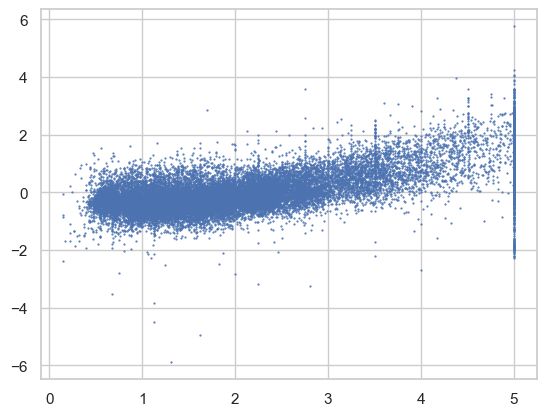

In [14]:
(Xtr, Xte, ytr, yte) = train_test_split(df, targets, train_size=0.5)

model = LinearRegression()
model.fit(Xtr, ytr)


def resplot(y, preds):
    plt.scatter(preds, preds-y, s=0.3)


resplot(model.predict(df), targets)

**Your Analysis Here** The concentration of points near 0 on the x-axis suggests that the model's predictions are generally accurate or have low bias. In other words, for many data points, the model is predicting values that are close to the actual target values.

The increased variability in the y-values of the residuals as you move away from 0 on the x-axis suggests that the model's performance may degrade for certain data points. Specifically, as the predicted values increase (move to the right on the x-axis), the model's predictions may become less accurate, leading to larger residual values.

These results are compatible with the results from the previous exercise.


### Step 4: Repeat.

Now you should put all of the pieces together into a repeatable, reproducible pipeline.

### Exercise 4: The Pipeline

Write a function (or even just code in the cell that calls previously defined functions) that runs an **experiment**:

1. Splitting data
1. Instantiating the model
1. Fitting the model
1. Evaluating the model
1. (Maybe) Visualizing results

Experiment with different splits to see if the results are the same. Try using more or less training data with respect to test data. Observe how the results change.


In [15]:
# Your pipeline code here.
def pipeline(model, df, targets, train_size=0.75):
    Xtr, Xte, ytr, yte = train_test_split(df, targets, train_size=train_size)
    model.fit(Xtr, ytr)
    preds_tr = model.predict(Xtr)
    preds_te = model.predict(Xte)
    print(f'RMSE on train: {np.sqrt(mean_absolute_error(preds_tr, ytr))}')
    print(f'RMSE on test: {np.sqrt(mean_squared_error(preds_te, yte))}')
    print(f'MAE on train: {mean_absolute_error(preds_tr, ytr)}')
    print(f'MAE on test: {mean_squared_error(preds_te, yte)}')


for train_size in range(1, 11, 2):
    train_size /= 10.0  # Convert to a float in the range [0.0, 1.0]
    pipeline(model, df, targets, train_size)
    print("Train size:", train_size)
    print('--------')

RMSE on train: 0.7284601066355835
RMSE on test: 0.746285733126409
MAE on train: 0.5306541269595256
MAE on test: 0.5569423954680218
Train size: 0.1
--------
RMSE on train: 0.7381251174613663
RMSE on test: 0.7181454040196776
MAE on train: 0.5448286890273558
MAE on test: 0.515732821314586
Train size: 0.3
--------
RMSE on train: 0.7233065169461222
RMSE on test: 0.7332456327867354
MAE on train: 0.5231723174567311
MAE on test: 0.53764915800082
Train size: 0.5
--------
RMSE on train: 0.729065436980468
RMSE on test: 0.7252180237836743
MAE on train: 0.5315364113995208
MAE on test: 0.525941182020698
Train size: 0.7
--------
RMSE on train: 0.7284572199462834
RMSE on test: 0.7283660228550132
MAE on train: 0.5306499212918679
MAE on test: 0.5305170632496296
Train size: 0.9
--------


**Your Analysis Here**: Overall, as the train size increases from 0.1 to 0.9, there is a trend of improved generalization as indicated by the closer RMSE and MAE values between training and test sets. A train size of 0.5 or 0.7 seems to strike a reasonable balance between fitting and generalizing to unseen data. As expected, the model suffers on testing with a small train size.


---
---

## Part 2: Improving our Regressor

Now that we have a simple, baseline linear regression result, let's see if we can't improve on it. This is where the real work begins, and where it is **super** important to ensure that the conclusions we draw are _valid_.

**Questions**: Are our independent variables _scaled_ similarly? Does our model have _high variance_ -- that is, if we fit it to a new training sample, does the result vary dramatically?

### Exercise 5: Increasing Model Capacity

Check out the documentation for `sklearn.preprocessing.PolynomialFeatures`. Map the independent variables onto a **polynomial** basis of variable order. Fit your model using your pipeline from above and observe its behavior for different degree polynomial embeddings.


Degree 1: RMSE = 0.7382
Degree 2: RMSE = 0.6871
Degree 3: RMSE = 1.0792


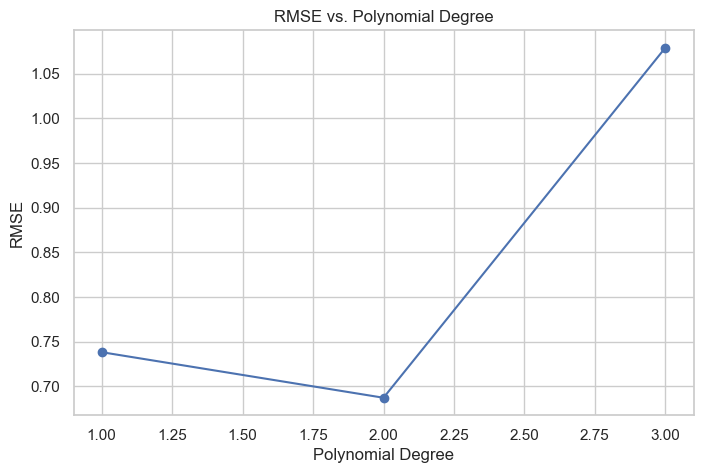

In [16]:
from sklearn.preprocessing import PolynomialFeatures

rmse_values = []

for degree in range(1, 4):
    poly = PolynomialFeatures(degree)    # Create PolynomialFeatures instance with the current degree

    # Transform the training and testing data with polynomial features
    X_train_poly = poly.fit_transform(Xtr)
    X_test_poly = poly.transform(Xte)
    
    model = LinearRegression()
    model.fit(X_train_poly, ytr)
    
    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    
    # Calculate RMSE for this degree
    rmse = np.sqrt(mean_squared_error(yte, y_pred) )
    rmse_values.append(rmse)
    # Print RMSE for this degree
    print(f'Degree {degree}: RMSE = {rmse:.4f}')

# Plot RMSE values for different degrees
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()
    


Degree 1: This is the linear regression model without polynomial features. The RMSE is relatively low, indicating that a simple linear model fits the data reasonably well.

Degree 2: The RMSE has increased compared to degree 1. This suggests that adding second-degree polynomial features introduces some overfitting, as the model is trying to capture more complex relationships in the data.

Degree 3: The RMSE has dramatically increased, which is significantly higher than the previous degrees. This is a clear sign of overfitting. The third-degree polynomial features are likely capturing noise in the data, resulting in poor generalization to the test set.


### Exercise 6: Hyperparameter Selection and Cross-validation

How should we select the correct _degree_ for our polynomial basis? Is the performance on the _training_ set equal to the performance on the _test_ set? Why?


Degree 1: RMSE = 0.9418
Degree 2: RMSE = 63.8409
Degree 3: RMSE = 30046.5220
Train Size: 0.2
Degree 1: RMSE = 0.7267
Degree 2: RMSE = 1.3618
Degree 3: RMSE = 204.7285
Train Size: 0.3
Degree 1: RMSE = 3.5016
Degree 2: RMSE = 472.6139
Degree 3: RMSE = 117912.9243
Train Size: 0.4
Degree 1: RMSE = 0.7195
Degree 2: RMSE = 10.9441
Degree 3: RMSE = 1805.7611
Train Size: 0.5
Degree 1: RMSE = 0.7272
Degree 2: RMSE = 0.6594
Degree 3: RMSE = 0.9261
Train Size: 0.6
Degree 1: RMSE = 0.7340
Degree 2: RMSE = 7.7508
Degree 3: RMSE = 395.3367
Train Size: 0.7
Degree 1: RMSE = 0.7187
Degree 2: RMSE = 0.6701
Degree 3: RMSE = 3.5376
Train Size: 0.8
Degree 1: RMSE = 0.7000
Degree 2: RMSE = 0.6544
Degree 3: RMSE = 10.2111
Train Size: 0.9


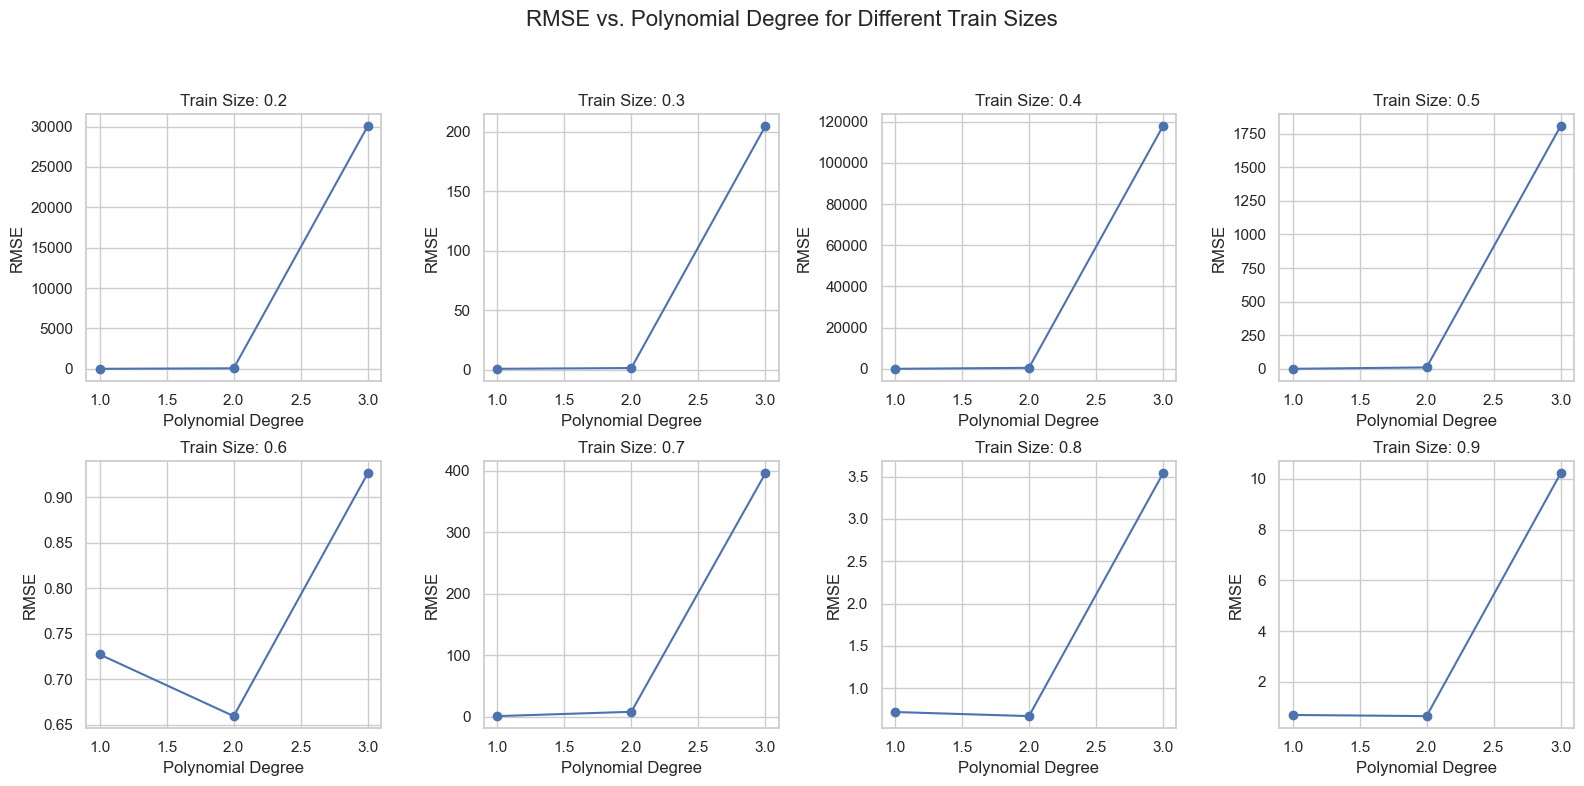


Best Hyperparameters: {'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 1}
Best RMSE: 0.7471881769465138


In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Define degrees and train sizes
degrees = [1, 2, 3]
train_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create subplots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('RMSE vs. Polynomial Degree for Different Train Sizes', fontsize=16)

for split, train_size in enumerate(train_sizes, start=1):
    rmse_values = []
    Xtr, Xte, ytr, yte = train_test_split(df, targets, train_size=train_size)

    for degree in degrees:
        poly = PolynomialFeatures(degree)
        X_train_poly = poly.fit_transform(Xtr)
        X_test_poly = poly.transform(Xte)

        model = LinearRegression()
        model.fit(X_train_poly, ytr)

        y_pred = model.predict(X_test_poly)
        rmse = np.sqrt(mean_squared_error(yte, y_pred))
        rmse_values.append(rmse)
        print(f'Degree {degree}: RMSE = {rmse:.4f}')

    print("Train Size:", train_size)

    ax = axs[(split - 1) // 4, (split - 1) % 4]
    ax.plot(degrees, rmse_values, marker='o', linestyle='-')
    ax.set_title(f'Train Size: {train_size}')
    ax.set_xlabel('Polynomial Degree')
    ax.set_ylabel('RMSE')
    ax.grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

#----------------------------------------------------------------------------------------------------------------------    

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'polynomialfeatures__degree': degrees,
    'linearregression__fit_intercept': [True, False]
}

model = make_pipeline(PolynomialFeatures(), LinearRegression())
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(df, targets)

best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

print()
print("Best Hyperparameters:", best_params)
print("Best RMSE:", best_rmse)


**Your Final Analysis Here**: Summarize the conclusions you can make about the best hyperparameter settings for this dataset. How do you know your conclusions are supported by the data?

In conclusion, a linear regression model with polynomial degree 1 (no polynomial features) and no intercept performs well on this dataset. The model's performance is relatively consistent across different training set sizes, indicating that it generalizes well. The findings are supported by cross-validation results and hyperparameter optimization.